# **Challenge Overview – Stock Agent**

Acting as consultants for an investment fund managing a portfolio of 11 stocks, your goal is to build an AI-powered solution that enhances investment decision-making. You may focus on the full portfolio or a specific subset. The aim is to demonstrate how AI can drive financial insights, whether through a trading agent, an analytical dashboard, or another innovative tool.
<br>
<br>
### **Tech & Tools**

It is mandatory to develop the solution in **Google Colab** using **Python**.

Other than that, you are completely free to choose your own:

•	Libraries and packages: Use any tool you need (e.g., Pandas, Scikit-learn, LangChain, etc.)

•	Visualization tools: Python-based tools (Matplotlib, Seaborn), Power BI, Tableau, etc. (if you use external visualization tools, don't forget to include prints in the submission zip folder)

•	AI assistants: Feel free to consult ChatGPT, GitHub Copilot, Gemini, or any other.
<br>
<br>
### **Tech Configuration**

**1** - The second code cell contains the code needed to export the dataset for the 11 assets. All data is saved as individual .csv files in a data/ directory, named according to the asset and frequency (e.g., AMZN_hourly.csv or AMZN_daily.csv).

**2** - The remaining cells include functions suggested by the dev team to help accelerate your solution. Each function comes with a description of its purpose and examples of expected usage. Feel free to use, adapt, extend, or completely rework them to fit your approach.

# Installs & Imports

In [78]:
%pip install protobuf==5.29.0 -q
%pip install yfinance==0.2.59 pandas==2.2.2 matplotlib==3.7.5 seaborn==0.13.2 -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import yfinance as yf

**Data Fetching**

In [80]:
DATA_PATH = 'data/'

In [81]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import os

# List of symbols to download
symbols = ["AMZN", "AAPL", "GOOGL", "MSFT", "UDMY", "NXE", "SPY",
           "CDR.WA", "EH", "BTC-USD", "ETH-USD"]

# Set date range
end_date = datetime.now()
start_date = end_date - timedelta(days=730)

start_str = start_date.strftime('%Y-%m-%d')
end_str = end_date.strftime('%Y-%m-%d')

print(f"Downloading hourly data from {start_str} to {end_str} (729 days)")

# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Download data for each symbol
for symbol in symbols:
    print(f"\nDownloading hourly data for {symbol}...")

    try:
        # Download hourly data
        data = yf.download(symbol, start=start_str, end=end_str, interval="1h", progress=False)

        if not data.empty:
            # Reset index to make Datetime a column
            data.reset_index(inplace=True)

            # Save to CSV
            safe_name = symbol.replace('-', '_').replace('.', '_')
            filename = f"data/{safe_name}_hourly.csv"
            data.to_csv(filename, index=False)
            print(f"Successfully downloaded {len(data)} rows of hourly data for {symbol}")

            # Display the first 5 rows of data
            print(f"\nFirst 5 rows of {symbol} data:")
            print(data.head())

        else:
            print(f"No hourly data available for {symbol}")

            # Try daily data instead
            print(f"Attempting to download daily data for {symbol} instead...")
            daily_data = yf.download(symbol, start=(start_date - timedelta(days=365)).strftime('%Y-%m-%d'),
                                    end=end_str, interval="1d", progress=False)

            if not daily_data.empty:
                daily_data.reset_index(inplace=True)
                filename = f"data/{symbol.replace('-', '_').replace('.', '_')}_daily.csv"
                daily_data.to_csv(filename, index=False)
                print(f"Successfully downloaded {len(daily_data)} rows of daily data for {symbol}")

                # Display the first 5 rows of daily data
                print(f"\nFirst 5 rows of {symbol} daily data:")
                print(daily_data.head())
            else:
                print(f"Failed to download any data for {symbol}")

    except Exception as e:
        print(f"Error downloading data for {symbol}: {str(e)}")

# Create summary of downloaded files
file_info = []
for symbol in symbols:
    safe_name = symbol.replace('-', '_').replace('.', '_')
    hourly_path = f"data/{safe_name}_hourly.csv"
    daily_path = f"data/{safe_name}_daily.csv"

    if os.path.exists(hourly_path):
        df = pd.read_csv(hourly_path)
        file_info.append({
            'Symbol': symbol,
            'Filename': hourly_path,
            'Rows': len(df),
            'Start Date': df['Datetime'].iloc[0],
            'End Date': df['Datetime'].iloc[-1],
            'Frequency': 'Hourly'
        })
    elif os.path.exists(daily_path):
        df = pd.read_csv(daily_path)
        file_info.append({
            'Symbol': symbol,
            'Filename': daily_path,
            'Rows': len(df),
            'Start Date': df['Date'].iloc[0],
            'End Date': df['Date'].iloc[-1],
            'Frequency': 'Daily'
        })
    else:
        file_info.append({
            'Symbol': symbol,
            'Filename': 'N/A',
            'Rows': 0,
            'Start Date': 'N/A',
            'End Date': 'N/A',
            'Frequency': 'N/A'
        })

# Display file summary
file_summary = pd.DataFrame(file_info)
print("\nFile Summary:")
print(file_summary)

print("\nData collection complete!")


1 Failed download:
['AMZN']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')



No hourly data available for AMZN
Attempting to download daily data for AMZN instead...



1 Failed download:
['AAPL']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')

1 Failed download:
['GOOGL']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')


Successfully downloaded 751 rows of daily data for AMZN

First 5 rows of AMZN daily data:
Price        Date       Close        High         Low        Open     Volume
Ticker                   AMZN        AMZN        AMZN        AMZN       AMZN
0      2022-05-31  120.209503  121.994499  115.675003  116.279999  144634000
1      2022-06-01  121.683998  125.179001  120.622498  122.255997  127528000
2      2022-06-02  125.511002  125.610001  120.044998  121.683998  100560000
3      2022-06-03  122.349998  124.400002  121.046501  124.199997   97604000
4      2022-06-06  124.790001  128.990005  123.809998  125.250000  135269000

No hourly data available for AAPL
Attempting to download daily data for AAPL instead...
Successfully downloaded 751 rows of daily data for AAPL

First 5 rows of AAPL daily data:
Price        Date       Close        High         Low        Open     Volume
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL
0      2022-05-31  146.489822  148.281


1 Failed download:
['MSFT']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')


Successfully downloaded 751 rows of daily data for GOOGL

First 5 rows of GOOGL daily data:
Price        Date       Close        High         Low        Open    Volume
Ticker                  GOOGL       GOOGL       GOOGL       GOOGL     GOOGL
0      2022-05-31  113.220703  115.184315  111.545211  112.210032  50012000
1      2022-06-01  113.350075  116.544306  112.711131  114.308498  36606000
2      2022-06-02  117.062828  117.338510  112.409082  113.457567  37992000
3      2022-06-03  113.995995  115.768025  112.978361  115.510255  26136000
4      2022-06-06  116.264641  118.779116  115.611263  116.149188  33542000

No hourly data available for MSFT
Attempting to download daily data for MSFT instead...



1 Failed download:
['UDMY']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')


Successfully downloaded 751 rows of daily data for MSFT

First 5 rows of MSFT daily data:
Price        Date       Close        High         Low        Open    Volume
Ticker                   MSFT        MSFT        MSFT        MSFT      MSFT
0      2022-05-31  265.144257  267.972508  262.276986  265.787933  37827700
1      2022-06-01  265.680725  270.820342  263.359598  268.391951  25292200
2      2022-06-02  267.787231  267.855507  255.128359  257.907860  44008200
3      2022-06-03  263.340057  266.685226  261.769901  263.622891  28059000
4      2022-06-06  262.101471  267.397133  260.609322  265.329583  22400300

No hourly data available for UDMY
Attempting to download daily data for UDMY instead...



1 Failed download:
['NXE']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')

1 Failed download:
['SPY']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')


Successfully downloaded 751 rows of daily data for UDMY

First 5 rows of UDMY daily data:
Price        Date  Close   High     Low   Open   Volume
Ticker              UDMY   UDMY    UDMY   UDMY     UDMY
0      2022-05-31  14.75  15.96  14.360  15.69  1177100
1      2022-06-01  13.45  14.92  13.370  14.59  1331000
2      2022-06-02  14.00  14.21  13.070  13.39  1407000
3      2022-06-03  14.27  14.39  13.325  13.85  1066300
4      2022-06-06  13.46  14.97  13.410  14.58  1088100

No hourly data available for NXE
Attempting to download daily data for NXE instead...
Successfully downloaded 751 rows of daily data for NXE

First 5 rows of NXE daily data:
Price        Date Close   High   Low  Open   Volume
Ticker              NXE    NXE   NXE   NXE      NXE
0      2022-05-31  4.75  5.030  4.66  4.98  2737700
1      2022-06-01  4.43  4.845  4.43  4.80  2493000
2      2022-06-02  4.85  4.900  4.45  4.45  2728800
3      2022-06-03  4.69  4.810  4.63  4.77  1992400
4      2022-06-06  4.68  4.820 


1 Failed download:
['CDR.WA']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685397600 and endTime=1748469600. The requested range must be within the last 730 days.")')


Successfully downloaded 751 rows of daily data for SPY

First 5 rows of SPY daily data:
Price        Date       Close        High         Low        Open    Volume
Ticker                    SPY         SPY         SPY         SPY       SPY
0      2022-05-31  395.224152  398.602789  392.448505  395.817562  95937000
1      2022-06-01  392.027374  398.392226  389.481428  397.368128  86585800
2      2022-06-02  399.492920  399.540764  389.586707  391.864661  79609600
3      2022-06-03  392.936646  396.286571  391.950812  394.716877  71874300
4      2022-06-06  394.133026  398.746329  392.946176  396.994810  57508900

No hourly data available for CDR.WA
Attempting to download daily data for CDR.WA instead...



1 Failed download:
['EH']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685419200 and endTime=1748491200. The requested range must be within the last 730 days.")')


Successfully downloaded 750 rows of daily data for CDR.WA

First 5 rows of CDR.WA daily data:
Price        Date       Close        High         Low        Open   Volume
Ticker                 CDR.WA      CDR.WA      CDR.WA      CDR.WA   CDR.WA
0      2022-05-30  110.276230  115.034396  110.198225  111.153761   341852
1      2022-05-31  105.947090  110.334739  105.771584  110.276232  1183493
2      2022-06-01  105.654587  107.858164  105.498578  106.571120   288755
3      2022-06-02  105.245079  106.337111  103.802027  106.337111   246179
4      2022-06-03  101.598442  106.961124  101.403438  106.181102   260094

No hourly data available for EH
Attempting to download daily data for EH instead...



1 Failed download:
['BTC-USD']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685404800 and endTime=1748476800. The requested range must be within the last 730 days.")')

1 Failed download:
['ETH-USD']: YFPricesMissingError('possibly delisted; no price data found  (1h 2023-05-30 -> 2025-05-29) (Yahoo error = "1h data not available for startTime=1685404800 and endTime=1748476800. The requested range must be within the last 730 days.")')


Successfully downloaded 751 rows of daily data for EH

First 5 rows of EH daily data:
Price        Date Close  High   Low  Open   Volume
Ticker               EH    EH    EH    EH       EH
0      2022-05-31  8.92  9.24  8.00  8.50  1139300
1      2022-06-01  9.04  9.16  8.73  8.99   459000
2      2022-06-02  9.20  9.33  8.95  9.04   512100
3      2022-06-03  9.05  9.16  8.88  9.08   264800
4      2022-06-06  9.36  9.69  9.19  9.34   554100

No hourly data available for BTC-USD
Attempting to download daily data for BTC-USD instead...
Successfully downloaded 1095 rows of daily data for BTC-USD

First 5 rows of BTC-USD daily data:
Price        Date         Close          High           Low          Open  \
Ticker                  BTC-USD       BTC-USD       BTC-USD       BTC-USD   
0      2022-05-30  31726.390625  31949.630859  29303.572266  29443.365234   
1      2022-05-31  31792.310547  32249.863281  31286.154297  31723.865234   
2      2022-06-01  29799.080078  31957.285156  29501.5878

**Possible Implementation Ideas**

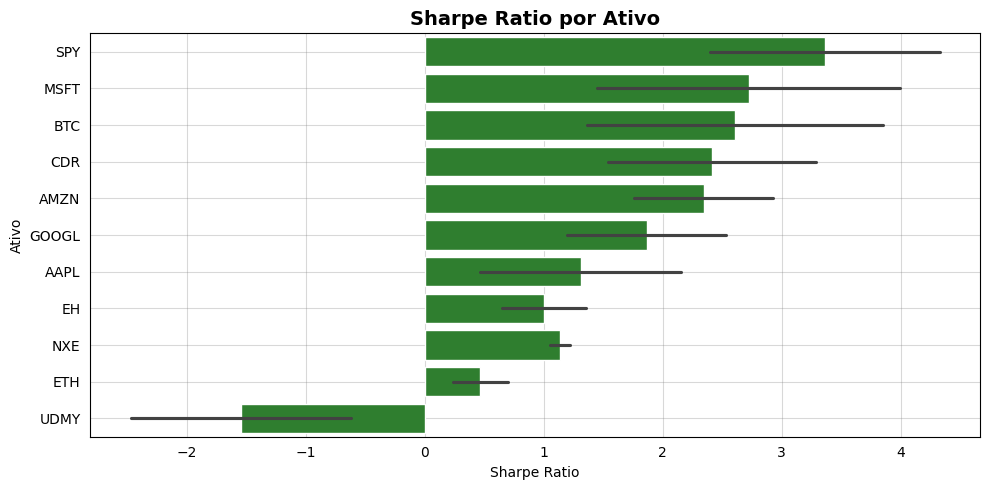

In [84]:
import os
import pandas as pd
import numpy as np

def calculate_sharpe_and_volatility(data, risk_free_rate=0.0, period_per_year=24*365):
    data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
    data.dropna(inplace=True)
    volatility = data['Returns'].std() * np.sqrt(period_per_year)
    avg_return = data['Returns'].mean() * period_per_year
    sharpe_ratio = (avg_return - risk_free_rate) / volatility
    return sharpe_ratio, volatility

def analyze_all_files(folder_path, risk_free_rate=0.02, period_per_year=24*365):
    results = []

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            try:
                file_path = os.path.join(folder_path, file)
                data = pd.read_csv(file_path, skiprows=[1])
                
                if 'Datetime' in data.columns:
                    data['Datetime'] = pd.to_datetime(data['Datetime'])
                if 'Close' not in data.columns:
                    continue

                sharpe, vol = calculate_sharpe_and_volatility(data.copy(), risk_free_rate, period_per_year)

                results.append({
                    'Ficheiro': file,
                    'Sharpe Ratio': round(sharpe, 4),
                    'Volatilidade': round(vol, 4)
                })
            except Exception as e:
                print(f"Erro ao processar {file}: {e}")

    return pd.DataFrame(results)

import matplotlib.pyplot as plt
import seaborn as sns

def mostrar_tabela_visual(df_resultados):
    if df_resultados.empty:
        print("Nenhum resultado para mostrar.")
        return

    # Extrair nome do ativo (ex: AMZN a partir de AMZN_hourly.csv)
    df_resultados['Ativo'] = df_resultados['Ficheiro'].apply(lambda f: f.split('_')[0])

    # Ordenar
    df_resultados = df_resultados.sort_values(by="Sharpe Ratio", ascending=False)

    # White background style
    plt.style.use('default')
    sns.set_style("whitegrid")

    # Gráfico
    plt.figure(figsize=(10, 5), facecolor='white')
    ax = sns.barplot(x='Sharpe Ratio', y='Ativo', data=df_resultados, color='forestgreen')

    ax.set_title('Sharpe Ratio por Ativo', fontsize=14, fontweight='bold', color='black')
    ax.set_xlabel('Sharpe Ratio', color='black')
    ax.set_ylabel('Ativo', color='black')
    ax.tick_params(colors='black')
    for spine in ax.spines.values():
        spine.set_color('black')
    plt.grid(True, color='gray', alpha=0.3)
    plt.tight_layout()
    plt.show()


# Caminho para os teus ficheiros
folder = "data"

# Analisar e mostrar
df_resultados = analyze_all_files(folder)
tabela_final = mostrar_tabela_visual(df_resultados)

In [89]:
def explore_data(data, symbol_name=None, ma_periods=[20, 50]):
    """Generate basic statistics and visualizations of the market data with moving averages."""
    
    # Print basic info about the dataset
    print(f"Dataset Info for {symbol_name if symbol_name else 'Stock'}:")
    print(f"Shape: {data.shape}")
    print(f"Date range: {data.iloc[0, 0]} to {data.iloc[-1, 0]}")
    print("\nSummary Statistics:")
    print(data.describe())
    
    # Determine the datetime column name
    datetime_col = 'Datetime' if 'Datetime' in data.columns else 'Date'
    
    # Convert datetime column to datetime type if it's not already
    data[datetime_col] = pd.to_datetime(data[datetime_col])
    
    # Calculate moving averages for closing price
    for period in ma_periods:
        data[f'MA_{period}'] = data['Close'].rolling(window=period).mean()
    
    # Calculate moving average for volume
    volume_ma_period = ma_periods[0]  # Use first MA period for volume
    data[f'Volume_MA_{volume_ma_period}'] = data['Volume'].rolling(window=volume_ma_period).mean()
    
    # Set white background style
    plt.style.use('default')
    
    # Create subplots - 2 rows, 1 column
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    fig.patch.set_facecolor('white')  # White background for figure
    
    # Plot 1: Closing Price over time with moving averages
    ax1.set_facecolor('white')  # White background for plot area
    ax1.plot(data[datetime_col], data['Close'], color='blue', linewidth=1, label='Close Price')
    
    # Add moving averages to price chart
    colors = ['red', 'orange', 'purple', 'brown']
    for i, period in enumerate(ma_periods):
        color = colors[i % len(colors)]
        ax1.plot(data[datetime_col], data[f'MA_{period}'], 
                color=color, linewidth=1.5, alpha=0.8, label=f'MA {period}')
    
    ax1.set_title(f'{symbol_name if symbol_name else "Stock"} - Closing Price Over Time with Moving Averages', 
                 fontsize=14, fontweight='bold', color='black')
    ax1.set_xlabel('Date', color='black')
    ax1.set_ylabel('Closing Price ($)', color='black')
    ax1.grid(True, alpha=0.3, color='gray')
    ax1.tick_params(axis='x', rotation=45, colors='black')
    ax1.tick_params(axis='y', colors='black')
    ax1.legend(loc='upper left', facecolor='white', edgecolor='black')
    
    # Set border colors to black for top plot
    for spine in ax1.spines.values():
        spine.set_color('black')
    
    # Plot 2: Volume over time with moving average
    ax2.set_facecolor('white')  # White background for plot area
    ax2.plot(data[datetime_col], data['Volume'], color='green', linewidth=1, alpha=0.7, label='Volume')
    ax2.plot(data[datetime_col], data[f'Volume_MA_{volume_ma_period}'], 
            color='darkgreen', linewidth=2, label=f'Volume MA {volume_ma_period}')
    
    ax2.set_title(f'{symbol_name if symbol_name else "Stock"} - Volume Over Time with Moving Average', 
                 fontsize=14, fontweight='bold', color='black')
    ax2.set_xlabel('Date', color='black')
    ax2.set_ylabel('Volume', color='black')
    ax2.grid(True, alpha=0.3, color='gray')
    ax2.tick_params(axis='x', rotation=45, colors='black')
    ax2.tick_params(axis='y', colors='black')
    ax2.legend(loc='upper left', facecolor='white', edgecolor='black')
    
    # Set border colors to black for bottom plot
    for spine in ax2.spines.values():
        spine.set_color('black')
    
    # Format y-axis for volume to show in millions/billions
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.1f}K'))
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
    
    # Print additional insights including moving averages
    print(f"Key Insights:")
    print(f"Highest closing price: ${data['Close'].max():.2f}")
    print(f"Lowest closing price: ${data['Close'].min():.2f}")
    print(f"Average closing price: ${data['Close'].mean():.2f}")
    print(f"Current MA {ma_periods[0]}: ${data[f'MA_{ma_periods[0]}'].iloc[-1]:.2f}")
    print(f"Current MA {ma_periods[1]}: ${data[f'MA_{ma_periods[1]}'].iloc[-1]:.2f}")
    print(f"Highest volume: {data['Volume'].max():,}")
    print(f"Average volume: {data['Volume'].mean():,.0f}")
    print(f"Current Volume MA {volume_ma_period}: {data[f'Volume_MA_{volume_ma_period}'].iloc[-1]:,.0f}")
    
    return None

Dataset Info for S&P 500 (SPY):
Shape: (3480, 6)
Date range: 2023-05-31 13:30:00+00:00 to 2025-05-28 19:30:00+00:00

Summary Statistics:
             Close         High          Low         Open        Volume
count  3480.000000  3480.000000  3480.000000  3480.000000  3.480000e+03
mean    518.951347   519.891781   517.940464   518.933122  8.138948e+06
std      58.752071    58.882061    58.612685    58.766192  5.156040e+06
min     409.820007   410.910004   408.910004   409.829987  0.000000e+00
25%     456.180305   456.678749   455.458740   456.025002  4.753550e+06
50%     523.950012   525.841888   522.884979   523.800018  6.959628e+06
75%     569.512512   570.344391   568.364990   569.584976  1.022432e+07
max     612.900024   613.229980   612.080017   612.820007  9.226401e+07


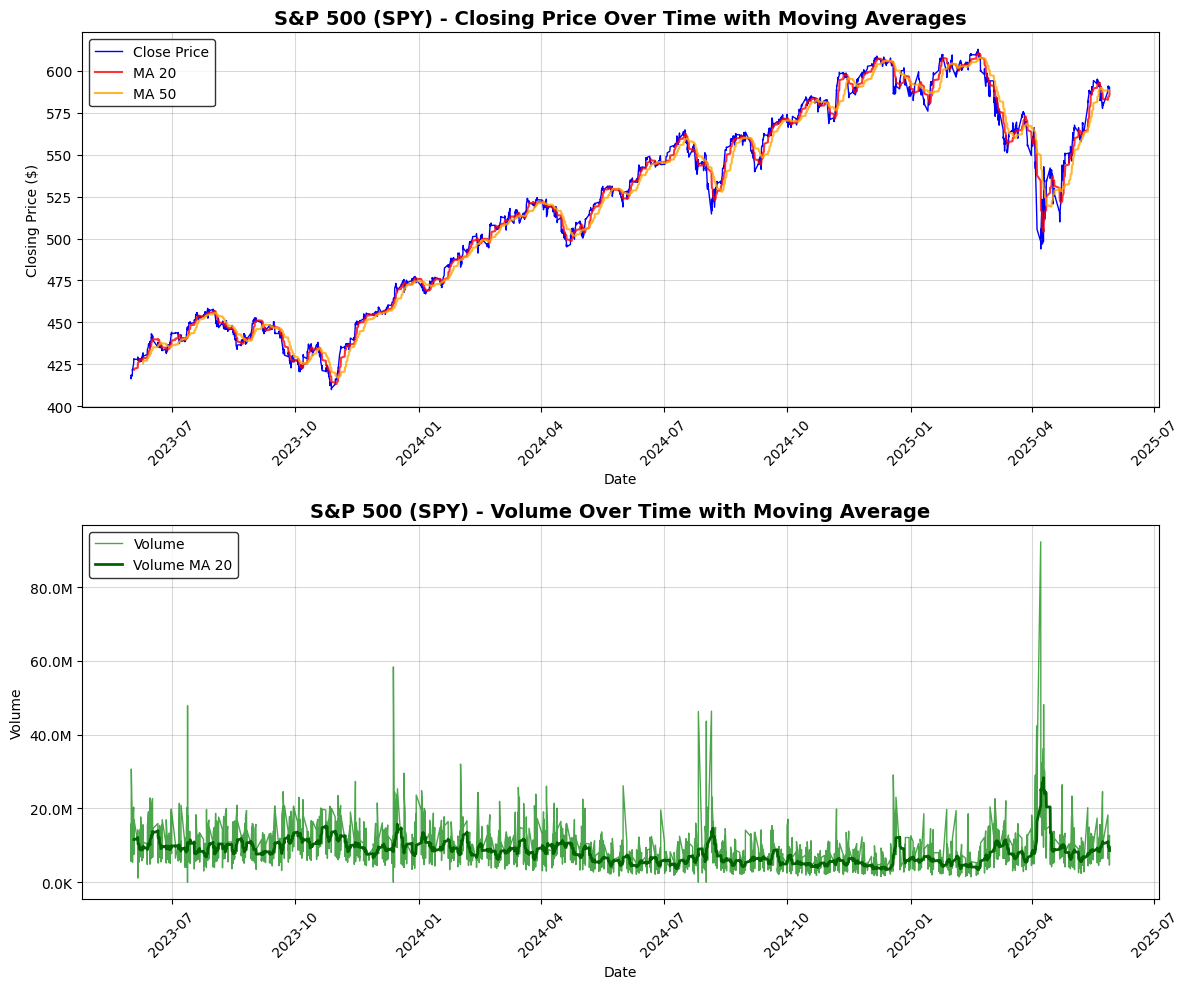

Key Insights:
Highest closing price: $612.90
Lowest closing price: $409.82
Average closing price: $518.95
Current MA 20: $586.67
Current MA 50: $588.13
Highest volume: 92,264,010
Average volume: 8,138,948
Current Volume MA 20: 8,573,834


In [90]:
spy_data = pd.read_csv(DATA_PATH + 'SPY_hourly.csv', skiprows=[1])
explore_data(spy_data, symbol_name='S&P 500 (SPY)')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_rsi(data, symbol_name=None):
    """Calcula e plota o RSI (Relative Strength Index) dos preços de fechamento."""
    
    # Certifica que a coluna de data está correta
    if not pd.api.types.is_datetime64_any_dtype(data['Datetime']):
        data['Datetime'] = pd.to_datetime(data['Datetime'])

    # Cálculo do RSI
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    average_gain = gain.rolling(window=14).mean()
    average_loss = loss.rolling(window=14).mean()

    rs = average_gain / average_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    plt.style.use('default')  # Set to default white background
    plt.figure(figsize=(12, 6), facecolor='white')
    plt.gca().set_facecolor('white')  # Ensure plot area is white

    plt.plot(data['Datetime'], data['RSI'], label='RSI (14 períodos)', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Sobrecompra (70)')
    plt.axhline(30, color='green', linestyle='--', label='Sobrevenda (30)')
    plt.title(f'{symbol_name} - Índice de Força Relativa (RSI)', color='black')
    plt.xlabel('Data', color='black')
    plt.ylabel('RSI', color='black')
    plt.legend(facecolor='white', edgecolor='black')
    plt.grid(True, color='gray', alpha=0.3)
    plt.xticks(rotation=45, color='black')
    plt.yticks(color='black')

# Set border colors to black
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_color('black')

    plt.tight_layout()
    plt.show()
    return None


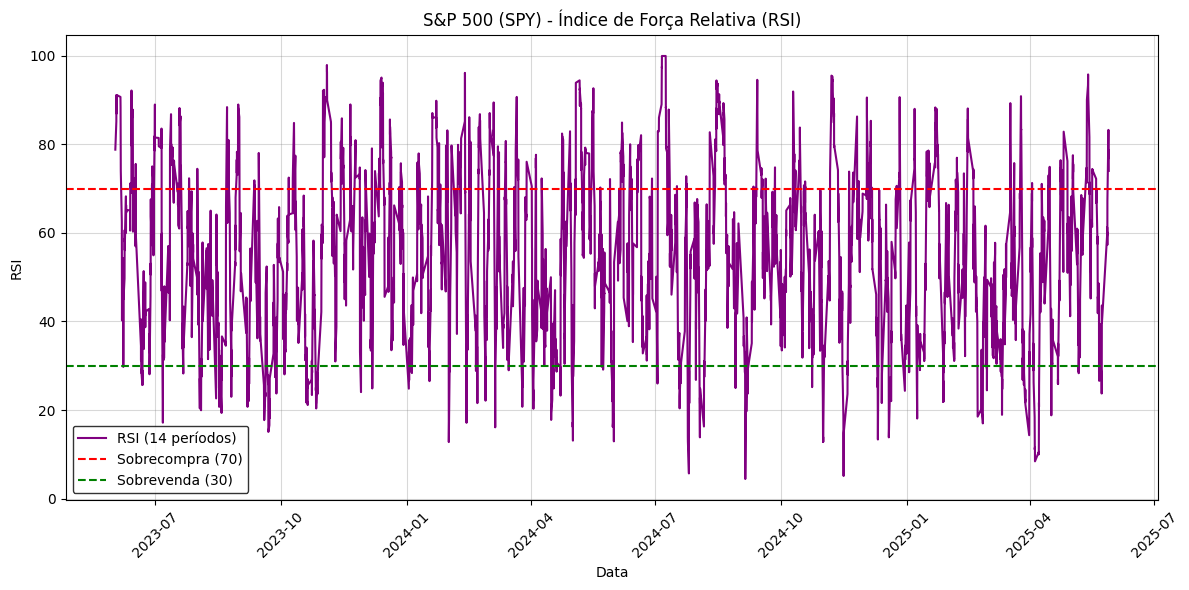

In [ ]:
plot_rsi(spy_data, symbol_name='S&P 500 (SPY)')

In [ ]:
def single_stock_analysis(symbol, folder_path="data"):
    """
    Comprehensive analysis for a single stock with technical indicators
    and investment recommendations.
    """
    
    print("=" * 60)
    print(f"📊 SINGLE STOCK ANALYSIS: {symbol}")
    print("=" * 60)
    
    # Find the file for this symbol
    file_found = False
    for file in os.listdir(folder_path):
        if file.startswith(symbol) and file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            file_found = True
            break
    
    if not file_found:
        print(f"❌ No data file found for {symbol}")
        return None
    
    try:
        # Load and prepare data
        data = pd.read_csv(file_path, skiprows=[1])
        data['Datetime'] = pd.to_datetime(data['Datetime'])
        
        # Calculate Sharpe ratio and volatility
        sharpe, volatility = calculate_sharpe_and_volatility(data.copy())
        
        # Calculate technical indicators
        data['MA_20'] = data['Close'].rolling(20).mean()
        data['MA_50'] = data['Close'].rolling(50).mean()
        data['MA_200'] = data['Close'].rolling(200).mean()
        
        # RSI calculation
        delta = data['Close'].diff(1)
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.rolling(14).mean()
        avg_loss = loss.rolling(14).mean()
        rs = avg_gain / avg_loss
        data['RSI'] = 100 - (100 / (1 + rs))
        
        # Bollinger Bands
        data['BB_Middle'] = data['Close'].rolling(20).mean()
        bb_std = data['Close'].rolling(20).std()
        data['BB_Upper'] = data['BB_Middle'] + (bb_std * 2)
        data['BB_Lower'] = data['BB_Middle'] - (bb_std * 2)
        
        # Current values
        current_price = data['Close'].iloc[-1]
        current_ma20 = data['MA_20'].iloc[-1]
        current_ma50 = data['MA_50'].iloc[-1]
        current_ma200 = data['MA_200'].iloc[-1]
        current_rsi = data['RSI'].iloc[-1]
        current_bb_upper = data['BB_Upper'].iloc[-1]
        current_bb_lower = data['BB_Lower'].iloc[-1]
        
        # Analysis
        trend_analysis = {
            'short_term': "BULLISH" if current_price > current_ma20 else "BEARISH",
            'medium_term': "BULLISH" if current_price > current_ma50 else "BEARISH",
            'long_term': "BULLISH" if current_price > current_ma200 else "BEARISH"
        }
        
        rsi_signal = "OVERBOUGHT" if current_rsi > 70 else "OVERSOLD" if current_rsi < 30 else "NEUTRAL"
        bb_signal = "OVERBOUGHT" if current_price > current_bb_upper else "OVERSOLD" if current_price < current_bb_lower else "NEUTRAL"
        
        # Print analysis
        print(f"\n📈 PRICE & PERFORMANCE")
        print("-" * 50)
        print(f"Current Price: ${current_price:.2f}")
        print(f"Sharpe Ratio: {sharpe:.4f}")
        print(f"Volatility: {volatility:.4f}")
        print(f"52-Week High: ${data['Close'].max():.2f}")
        print(f"52-Week Low: ${data['Close'].min():.2f}")
        
        print(f"\n📊 TECHNICAL INDICATORS")
        print("-" * 50)
        print(f"MA(20): ${current_ma20:.2f} | {trend_analysis['short_term']}")
        print(f"MA(50): ${current_ma50:.2f} | {trend_analysis['medium_term']}")
        print(f"MA(200): ${current_ma200:.2f} | {trend_analysis['long_term']}")
        print(f"RSI(14): {current_rsi:.1f} | {rsi_signal}")
        print(f"Bollinger Bands: {bb_signal} (${current_bb_lower:.2f} - ${current_bb_upper:.2f})")
        
        # Investment recommendation
        print(f"\n💡 INVESTMENT RECOMMENDATION")
        print("-" * 50)
        
        bullish_signals = sum([1 for trend in trend_analysis.values() if trend == "BULLISH"])
        
        if bullish_signals >= 2 and rsi_signal != "OVERBOUGHT":
            recommendation = "🟢 BUY"
            reason = "Strong bullish trend with good RSI levels"
        elif bullish_signals <= 1 or rsi_signal == "OVERBOUGHT":
            recommendation = "🔴 SELL/AVOID"
            reason = "Weak trend or overbought conditions"
        else:
            recommendation = "🟡 HOLD"
            reason = "Mixed signals, wait for clearer direction"
        
        print(f"Signal: {recommendation}")
        print(f"Reason: {reason}")
        
        # Risk assessment
        risk_level = "HIGH" if volatility > 1.0 else "MEDIUM" if volatility > 0.5 else "LOW"
        print(f"Risk Level: {risk_level}")
        
        # Visual analysis
        plt.style.use('default')
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        fig.patch.set_facecolor('white')
        
        # Price chart with moving averages
        ax1.plot(data['Datetime'], data['Close'], color='blue', linewidth=1, label='Close Price')
        ax1.plot(data['Datetime'], data['MA_20'], color='red', linewidth=1, label='MA(20)')
        ax1.plot(data['Datetime'], data['MA_50'], color='orange', linewidth=1, label='MA(50)')
        ax1.plot(data['Datetime'], data['MA_200'], color='purple', linewidth=1, label='MA(200)')
        ax1.set_title(f'{symbol} - Price with Moving Averages', fontweight='bold', color='black')
        ax1.set_ylabel('Price ($)', color='black')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # RSI
        ax2.plot(data['Datetime'], data['RSI'], color='purple', linewidth=1)
        ax2.axhline(y=70, color='red', linestyle='--', alpha=0.8, label='Overbought')
        ax2.axhline(y=30, color='green', linestyle='--', alpha=0.8, label='Oversold')
        ax2.axhline(y=50, color='blue', linestyle=':', alpha=0.6, label='Neutral')
        ax2.set_title(f'{symbol} - RSI (14)', fontweight='bold', color='black')
        ax2.set_ylabel('RSI', color='black')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Bollinger Bands
        ax3.plot(data['Datetime'], data['Close'], color='blue', linewidth=1, label='Close Price')
        ax3.plot(data['Datetime'], data['BB_Upper'], color='red', linestyle='--', alpha=0.7, label='Upper BB')
        ax3.plot(data['Datetime'], data['BB_Lower'], color='green', linestyle='--', alpha=0.7, label='Lower BB')
        ax3.fill_between(data['Datetime'], data['BB_Upper'], data['BB_Lower'], alpha=0.1, color='gray')
        ax3.set_title(f'{symbol} - Bollinger Bands', fontweight='bold', color='black')
        ax3.set_ylabel('Price ($)', color='black')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Volume
        ax4.bar(data['Datetime'], data['Volume'], color='green', alpha=0.7)
        ax4.set_title(f'{symbol} - Volume', fontweight='bold', color='black')
        ax4.set_ylabel('Volume', color='black')
        ax4.grid(True, alpha=0.3)
        
        # Styling
        for ax in [ax1, ax2, ax3, ax4]:
            ax.tick_params(colors='black')
            for spine in ax.spines.values():
                spine.set_color('black')
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Summary
        print(f"\n🎯 KEY TAKEAWAYS")
        print("-" * 50)
        print(f"✅ Overall Trend: {max(trend_analysis.values(), key=list(trend_analysis.values()).count)}")
        print(f"📊 Current Signal: {recommendation.split(' ')[1]}")
        print(f"⚠️  Risk Level: {risk_level}")
        print(f"🎯 Next Support: ${min(current_ma20, current_ma50, current_bb_lower):.2f}")
        print(f"🎯 Next Resistance: ${max(current_ma20, current_ma50, current_bb_upper):.2f}")
        
        return {
            'symbol': symbol,
            'current_price': current_price,
            'sharpe': sharpe,
            'volatility': volatility,
            'rsi': current_rsi,
            'trend_analysis': trend_analysis,
            'recommendation': recommendation,
            'risk_level': risk_level
        }
        
    except Exception as e:
        print(f"❌ Error analyzing {symbol}: {e}")
        return None

# Usage examples:
single_stock_analysis("SPY_hourly.csv")
# single_stock_analysis("GOOGL")
# single_stock_analysis("BTC_USD")

📊 SINGLE STOCK ANALYSIS: data/SPY_hourly.csv
❌ No data file found for data/SPY_hourly.csv
